##### Grading Feedback Cell

**Question 0 (-2 pts if not provided):**  Enter your name and SU ID in the cell below.

Your name and SU ID Here: Abhijith Anil Vamadev 495204994

# IST 718: Big Data Analytics

- Professors: 
  - Willard Williamson <wewillia@syr.edu>
  - Emory Creel <emcreel@g.syr.edu>
- Faculty Assistants: 
  - Warren Justin Fernandes <wjfernan@syr.edu>
  - Ruchita Hiteshkumar Harsora <	rharsora@g.syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- Google Colab is the official class runtime environment so you should test your code on Colab before submission.
- Do not modify cells marked as grading cells or marked as do not modify.
- Before submitting your work, remember to check for run time errors with the following procedure:
`Runtime `$\rightarrow$ Factory reset runtime followed by Runtime $\rightarrow$ Run All.  All runtime errors will result in a minimum penalty of half off.
- All plots shall include descriptive title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Your notebook must run from start to finish without requiring manual input by the graders.  For example, do not mount your personal Google drive in your notebook as this will require graders to perform manual steps.  In short, your notebook should run from start to finish with no runtime errors and no need for graders to perform any manual steps.

# Medical Insurance Analysis
This assignment uses a medical insurance dataset with the following columns:
- age: age of primary beneficiary
- sex: female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast,southwest, northwest.
- charges: Individual medical costs billed by health insurance

**Note that you are required to split data into train / test / validation sets as needed to use in the pipelines created in this and future assignments**.

In [1]:
%%bash
# Do not change or modify this cell
# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already installed
pip install pyspark &> /dev/null

# Download the data files from github
# If the data file does not exist in the colab environment
data_file_1=insurance.csv

if [[ ! -f ./${data_file_1} ]]; then 
   # download the data file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/${data_file_1} &> /dev/null
fi

# Question 1 (10 pts):
Read the data into a spark dataframe named medical_df.  Column names should be named age, sex, bmi, children, smoker, region, and charges.  Print the resulting dataframe schema and shape such that it is easy for the graders to find and interpret.  Verify your schema makes sense.  If the schema does not makes sense, fix it.

In [2]:
# Your code here
#import libraries
from pyspark.sql import SparkSession
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import Row
from pyspark.sql.functions import col,struct,when
from pyspark.sql import functions as fn
from pyspark.sql.types import StringType, StructType, IntegerType, StructField, BooleanType, DoubleType

#start spark
spark = SparkSession.builder.appName('spark-intro').getOrCreate()
sc = spark.sparkContext
medical_df = spark.read.format("csv").option("header","true").load("insurance.csv") #reading all files
medical_df = medical_df.withColumn("age",medical_df.age.cast('int')).\
      withColumn("bmi",medical_df.bmi.cast('double')).\
      withColumn("children",medical_df.children.cast('int')).\
      withColumn("charges",medical_df.charges.cast('double'))
#change column types
medical_df.printSchema()#print schema
medical_df.show(5)#top 5 rows
print("Shape of the medical_df:",(medical_df.count(), len(medical_df.columns))) #shape of dataset


root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
+---+------+------+--------+------+---------+-----------+
only showing top 5 rows

Shape of the medical_df: (1338, 7)


##### Grading Feedback Cell

# Question 2 (10 pts):
Explore the data.  Make a pair plot.  Use a spark built in function to provide a statistical summary of medical_df.

Explain the following 2 items:
- What variables are positively and negatively correlated with charges.
- Provide a brief summary that highlights what is interesting about the summary statistics. 


+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|summary|               age|   sex|               bmi|         children|smoker|   region|           charges|
+-------+------------------+------+------------------+-----------------+------+---------+------------------+
|  count|              1338|  1338|              1338|             1338|  1338|     1338|              1338|
|   mean| 39.20702541106129|  null|30.663396860986538|  1.0949177877429|  null|     null|13270.422265141257|
| stddev|14.049960379216147|  null| 6.098186911679012|1.205492739781914|  null|     null|12110.011236693992|
|    min|                18|female|             15.96|                0|    no|northeast|         1121.8739|
|    25%|                27|  null|             26.29|                0|  null|     null|         4738.2682|
|    50%|                39|  null|              30.4|                1|  null|     null|         9377.9047|
|    75%|          

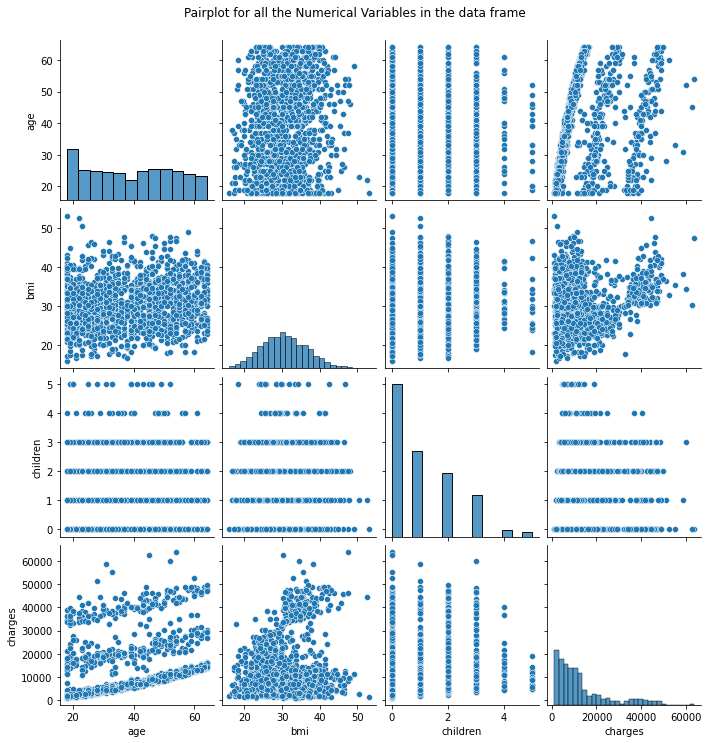

In [3]:
# your code here
# Seaborn visualization library
import seaborn as sns

medical_df_pd = medical_df.toPandas() #converting to pandas to graph

# Create the default pairplot
print(medical_df.summary().show())#using spark built in summary function
g = sns.pairplot(medical_df_pd)#pairplot
g.fig.suptitle("Pairplot for all the Numerical Variables in the data frame", y = 1.03)
plt.show()

Your explanation here: <br>
Variables that are positively correlated with charges: age, bmi, children, also as you smoke you are more frequent to having more charges, no variables negatively correlate. Positive variables in corelation with Charges: age, bmi and children.
For the summary of statistics it seems that at most everyone in the data had 5 children at most and 0 children the least. As age increase charges do tend to increase, which is similar to smoker. If you are a smoker on average you have higher charges than a non-smoker and BMI looks like it has a normal/gaussian distribution. 

##### Grading Feedback Cell

# Question 3 (10 pts):
Do some data exploration.  Create 2 plots which highlight something interesting / surprising about the data. Provide descriptions of the 2 plots that you made.  Why did you make this plots and what is interesting about them. You will be graded as compared to the rest of the class on this question.

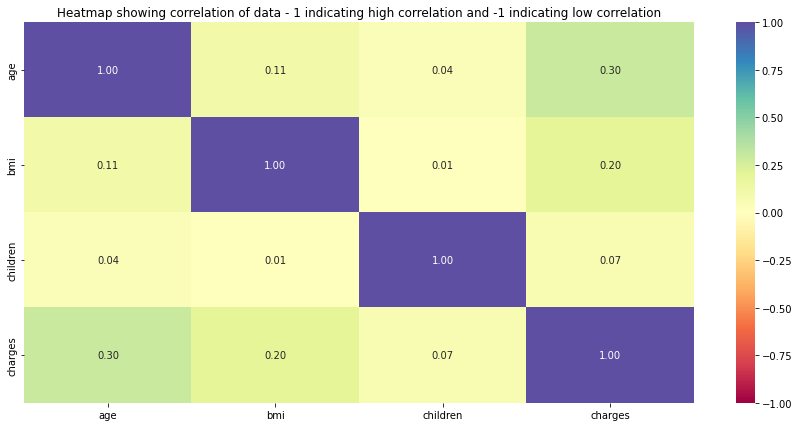

In [4]:
# Your code here
plt.figure(figsize=(15, 7))
sns.heatmap(medical_df_pd.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") #Heatmap for all the continous variables
plt.title("Heatmap showing correlation of data - 1 indicating high correlation and -1 indicating low correlation")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

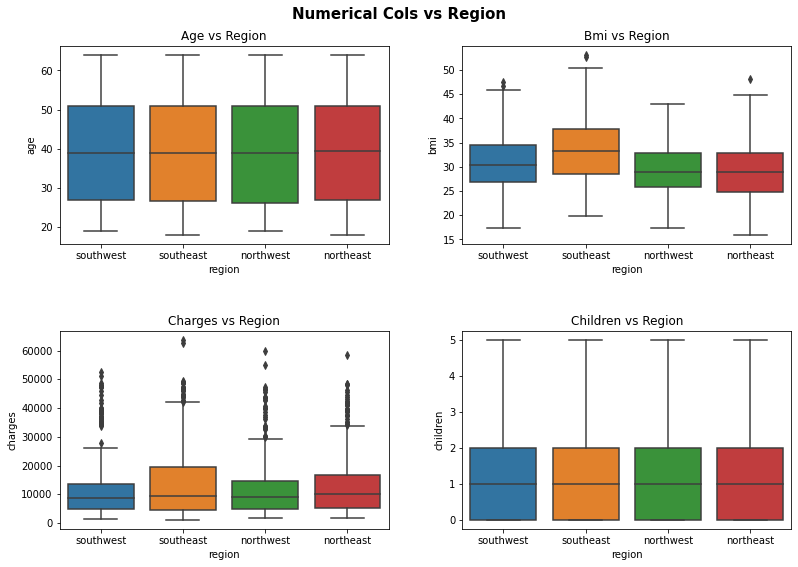

In [5]:
cols = medical_df_pd[["age", "bmi", "charges", "children"]] #all the numerical cols
fig = plt.figure(figsize=(12,12))
fig.suptitle("Numerical Cols vs Region", fontsize = 15, fontweight = 'bold')
for i,variable in enumerate(cols):
  plt.subplot(3, 2, i+ 1)
  sns.boxplot(medical_df_pd['region'], medical_df_pd[variable])
  plt.title("{} vs {}".format(str(variable).capitalize(), 'Region')) #plot region vs all numerical cols
  plt.tight_layout(pad=4.0)
plt.show()

Your explanation here:<br>
1. The first plot is a heat map. Heat map is a nice way to vision the correlation between the numerical data. Here we can see the correlation between age, bmi, children and charges. The lighter the color the lower the correlation (-1), the brighter the color (+1) the higher the correlation. Age followed by BMI shows some form of correlation with charges.
2. Plot two has 4 distinct plots, each of plot is a reresentation between each of the regions and the numerical variables. By looking at the graph we can get a general idea of each of the nuemerical variables by region. We can see that aross all the regions the age of participants remain the same. Charges on average are about the same for southwest and northwest and for southesat nad northeast. Lots of outliers visible for charges in region plot.

##### Grading Feedback Cell

# Question 4 (10 pts): 
In this question you will perform feature engineering.  The medical_df is not ready for use with linear regression because some columns are categorical.  Create a new dataframe named fe_medical_df (feature engineered medical dataframe) which adds new feature engineered columns. Your feature engineering should take into account the best practices outlined in lecture.  You are free to ignore the best practices as long as your feature engineering produces better machine learning results than the best practices would have produced. We will be looking at your model scores in the following questions and grading your results as compared to the rest of the class. The feature engineering you perform in this question will have a direct result on how well your model performs below.  Encapsulate your feature engineering in a spark machine learning pipeline named fe_pipe (feature engineering pipe).

Provide an explanation on exactly what feature engineering transformations you made for every column you transform.  We expect to see a separate explanation for each and every transformation performed. 

In [6]:
# your code here
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,  StandardScaler
from pyspark.ml.regression import LinearRegression

#seperating all the columns
int_cols = ['age', "bmi", "charges"]
cat_cols = ['sex', 'smoker', 'region', 'children'] #since number of children are limited from 0 to 5 i have decided to treat it as a categorical variable
all_cols = ['age', "bmi", "charges", 'sex', 
            'smoker',"children0","children1","children2",
            "children3", "children4",'region0', 'region1', 'region2']

vecAssembler = VectorAssembler(outputCol="features") #vec assembly 
vecAssembler.setInputCols(int_cols)

gender_indexer = StringIndexer(outputCol='sex_encoded') #gender indexing
gender_indexer.setInputCol(cat_cols[0])

smoker_indexer = StringIndexer(outputCol='smoker_encoded') #smoker indexing
smoker_indexer.setInputCol(cat_cols[1])

region_indexer = StringIndexer(outputCol='region_encoded') #change encoding 
region_indexer.setInputCol(cat_cols[2])

ohe = OneHotEncoder(inputCol = 'region_encoded') #one hot encoding region dropping last region
ohe.setOutputCol('final_region_encoded')

ohe_child = OneHotEncoder(inputCol = 'children') #one hot encoding children dropping last child
ohe_child.setOutputCol('final_child_encoded')

final = VectorAssembler(inputCols=['features','sex_encoded', 
                                   'smoker_encoded','final_child_encoded',
                                   'final_region_encoded' ], 
                        outputCol='final_features') #final vector assembly

fe_pipe = Pipeline(stages=[vecAssembler,gender_indexer, 
                           smoker_indexer, region_indexer, 
                           ohe, ohe_child, final]) #final pinepline
fe_fitted = fe_pipe.fit(medical_df)#fit pipline
fe_medical_df = fe_pipe.fit(medical_df).transform(medical_df)#transofrm
fe_medical_df = fe_medical_df.select(['final_features']) #select final features
fe_medical_df = fe_medical_df.rdd.map(lambda x:[float(y) for y in x['final_features']]).toDF(all_cols) #replace final features column title with all the transofmred column titles


In [7]:
# Grading cell do not modify
display(fe_medical_df.show(10))
fe_medical_df.printSchema()

+----+------+-----------+---+------+---------+---------+---------+---------+---------+-------+-------+-------+
| age|   bmi|    charges|sex|smoker|children0|children1|children2|children3|children4|region0|region1|region2|
+----+------+-----------+---+------+---------+---------+---------+---------+---------+-------+-------+-------+
|19.0|  27.9|  16884.924|1.0|   1.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    0.0|    1.0|
|18.0| 33.77|  1725.5523|0.0|   0.0|      0.0|      1.0|      0.0|      0.0|      0.0|    1.0|    0.0|    0.0|
|28.0|  33.0|   4449.462|0.0|   0.0|      0.0|      0.0|      0.0|      1.0|      0.0|    1.0|    0.0|    0.0|
|33.0|22.705|21984.47061|0.0|   0.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    1.0|    0.0|
|32.0| 28.88|  3866.8552|0.0|   0.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    1.0|    0.0|
|31.0| 25.74|  3756.6216|1.0|   0.0|      1.0|      0.0|      0.0|      0.0|      0.0|    1.0|    0.0|    0.0|
|

None

root
 |-- age: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- charges: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- smoker: double (nullable = true)
 |-- children0: double (nullable = true)
 |-- children1: double (nullable = true)
 |-- children2: double (nullable = true)
 |-- children3: double (nullable = true)
 |-- children4: double (nullable = true)
 |-- region0: double (nullable = true)
 |-- region1: double (nullable = true)
 |-- region2: double (nullable = true)



Your explanation here:<br>
Stages for feature engineering: 
1. Vector assembler - taking in the age bmi and charges column.
2. In Question 5 and below I will be doing a standard scalear for the vector assembler above except for charges.
3. Gender indexer - since gender is a binary variable, an indexer has been done to gender to get it in 0 or 1 format. 
4. Smoker indexer - since smoker is a binary variable, an indexer has been done to smoker to get it in a 0 or 1 format.
5. Region Indexer - SInce region is in str variable, indexing it first to get it in the fomrat of 0, 1, 2, 3
6. Ohe - One hot encoder for the region variable, as there are 4 seperate variables it can be serpate into region 0, region1, region2 
7. Ohe_child - One hot encoder for the children variable, since the children variable is alread in a format of 0, 1,2,3,4,5 it can be treated similarly to the region variable and it has been encoded into children0, 1, 2,3,4.
8. Final - Vector assembler that takes in all the variables mentioned above, the inital vector assembler, gender, smoekr, region indexer and ohe, and ohe_child. 
<br>
These are the stages before the pipeline. 

##### Grading Feedback Cell

# Question 5 (10 pts):
Create a new pipeline named lr_pipe which encapsulates fe_pipe, any needed linear regression support objects, and a linear regression object.  Linear regression support objects are anything you need over and above what is in fe_pipe in order to successfully run linear regression.  Write some code that prints out the stage names of lr_pipe and fe_pipe such that it's easy for the graders to find and interpret.  We don't expect to have to read code to interpret your results.

Train and test lr_pipe using fe_medical_df. To evaluate lr_pipe, first write a spark expression to compute MSE on the resulting dataframe.  Second, use a built in spark evaluator object to compute MSE.  Print out the results from both your own code and the built in evaluator object such that it's easy for the graders to find, interpret, and distinguish between the 2 test cases. We don't expect to have to reverse engineer your code to interpret the expected results.

In [8]:
# your code here
from statistics import mean
from pyspark.mllib.evaluation import RegressionMetrics

train_df, test_df = fe_medical_df.randomSplit([0.8, 0.2], 0)

all_features = ['age', 'bmi',  'sex', 'smoker',"children0","children1",
                "children2","children3", "children4",'region0', 
                'region1', 'region2']

medical_df_cols_int = ['age', 'bmi', 'children']
medical_df_cols_cat = ['sex', 'smoker', 'region']

new_vecAssembler = VectorAssembler(outputCol="features") #vec assembler for int cols
new_vecAssembler.setInputCols(medical_df_cols_int)

sc = StandardScaler(withMean=True, inputCol='features', outputCol='scaled') #scale vec assembler
gender_indexer = StringIndexer(outputCol='sex_encoded')#sec encoder
gender_indexer.setInputCol(medical_df_cols_cat[0])

smoker_indexer = StringIndexer(outputCol='smoker_encoded') #smoker encoer
smoker_indexer.setInputCol(medical_df_cols_cat[1])

region_indexer = StringIndexer(outputCol='region_encoded') #change encoding 
region_indexer.setInputCol(medical_df_cols_cat[2])
final = VectorAssembler(inputCols=['scaled','sex_encoded', 
                                   'smoker_encoded',"region_encoded",
                                   ], outputCol='final_features') #final assembler

lr = LinearRegression(featuresCol = 'final_features', labelCol='charges') #Liner regression obj
lr_pipe = Pipeline(stages=[new_vecAssembler,sc,gender_indexer, smoker_indexer,region_indexer,final, lr])
lr_fitted = lr_pipe.fit(medical_df)
lr_model = lr_pipe.fit(medical_df).transform(medical_df)

print("Fe_pipe Stages: ", fe_fitted.stages) #stages for fe_pipe
print("lr_pipe Stages: ", lr_fitted.stages) #stages for lr_pipe

#MSE = SUM((PREDICTION - ACTUAL )^ 2)/Total Number of Charges
mse = lr_model.select(( (lr_model.charges - lr_model.prediction) **2)).\
      groupby().sum().collect()[0][0]/lr_model.count()
print("MSE Computed by me: ", round(mse,4))

valuesAndPreds = lr_model.select(['charges', 'prediction'])
# It needs to convert to RDD as the parameter of RegressionMetrics
valuesAndPreds = valuesAndPreds.rdd.map(tuple)
metrics = RegressionMetrics(valuesAndPreds)
# Squared Error
print("MSE = %s" % round(metrics.meanSquaredError,4))

Fe_pipe Stages:  [VectorAssembler_a35aab59fe71, StringIndexerModel: uid=StringIndexer_b71746d0f56c, handleInvalid=error, StringIndexerModel: uid=StringIndexer_4feb19147d39, handleInvalid=error, StringIndexerModel: uid=StringIndexer_cf0f48fccc16, handleInvalid=error, OneHotEncoderModel: uid=OneHotEncoder_42b81adb6514, dropLast=true, handleInvalid=error, OneHotEncoderModel: uid=OneHotEncoder_d66103f9cadc, dropLast=true, handleInvalid=error, VectorAssembler_c5f283b6a531]
lr_pipe Stages:  [VectorAssembler_4a40561fac8b, StandardScalerModel: uid=StandardScaler_961e96b2f951, numFeatures=3, withMean=true, withStd=true, StringIndexerModel: uid=StringIndexer_b281686af59e, handleInvalid=error, StringIndexerModel: uid=StringIndexer_1a1967bc63c0, handleInvalid=error, StringIndexerModel: uid=StringIndexer_c43287ad678e, handleInvalid=error, VectorAssembler_7cd9b47e8ea7, LinearRegressionModel: uid=LinearRegression_edff3b5b0f4e, numFeatures=6]
MSE Computed by me:  36604053.4709


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:159: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


MSE = 36604053.4709


##### Grading Feedback Cell

# Question 6 (10 pts):
The goal of this question is to build a pipeline which can be used to perform inference.  Create a new pipeline named inf_pipe which encapsulates fe_pipe and adds new spark ML statistical components, linear regression support components, and a linear regression object.  The goal is to compare linear regression coefficients between each other in order to learn something about the data set.  Exclude any features which are not useful to the analysis.  inf_pipe Shall use the charges column as the target.  Score inf_pipe using a spark built in evaluator with the MSE scoring metric.  The output dataframe shall be named inf_medical_df.

Explanation:  First, explain what spark ML statistical component(s) you added to inf_pipe which were needed in order to be able to compare linear regression components between each other.  Second, explain what features you excluded from the analysis (if any) and why.

In [9]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler,  StandardScaler
from pyspark.sql.functions import col, sumDistinct, udf
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import lit


int_cols = ['age', "bmi"] #int cols
cat_cols = ['sex', 'smoker', 'region'] #cat cols
all_cols = ['age', "bmi", 'sex', 'smoker',"children0",
            "children1","children2","children3", "children4",
            'region0', 'region1', 'region2'] #all cols after feature engineering

vecAssembler = VectorAssembler(outputCol="features")#vector assembly
vecAssembler.setInputCols(int_cols)

sc = StandardScaler(withMean=True, inputCol='features', outputCol='scaled') #scaling variables
final = VectorAssembler(inputCols=['scaled','sex', 'smoker',"children0",
                                   "children1",'region0',  'region2'],
                         outputCol='final_features') #final vector assembly
lr = LinearRegression(featuresCol = 'final_features', labelCol='charges')#linear regression supporting variables

inf_pipe = Pipeline(stages=[vecAssembler,sc,final, lr]) #linear regression object in pipleine
inf_fitted = inf_pipe.fit(train_df)
inf_medical_df = inf_pipe.fit(train_df).transform(train_df)

pred = inf_medical_df.select(['prediction'])
inf_medical_df = inf_medical_df.select(['final_features','charges', 'prediction'])

# Squared Error
print("R2 for model inf_pipe: ",inf_fitted.stages[-1].summary.r2)
print("Coefficents for inf_pipe: ",inf_fitted.stages[-1].coefficients)
print("P-Values for inf_pipe: ",inf_fitted.stages[-1].summary.pValues)
print("MSE for inf_pipe: ",inf_fitted.stages[-1].summary.meanSquaredError)


R2 for model inf_pipe:  0.7641578274210992
Coefficents for inf_pipe:  [3500.803132165609,1991.2724240380405,-310.11756210882754,23813.937433210183,-1466.4552768779658,-1266.070291250387,-920.3954875296065,-1118.9885131383735]
P-Values for inf_pipe:  [0.0, 0.0, 0.3910473950119546, 0.0, 0.0004404603980163735, 0.009312844346740956, 0.042097620090780996, 0.014172211792833567, 0.0]
MSE for inf_pipe:  33870175.209396124


In [10]:
# Grading cell do not modify
display(inf_medical_df.show(10))

+--------------------+-----------+-------------------+
|      final_features|    charges|         prediction|
+--------------------+-----------+-------------------+
|(8,[0,1,4],[-1.48...|  1694.7964|  -1523.85907602704|
|(8,[0,1,3],[-1.48...| 12829.4551| 24186.806668323734|
|[-1.4883661985347...|  1607.5101|-1191.8016328170033|
|(8,[0,1,4],[-1.48...|  1702.4553|  258.7006373466811|
|(8,[0,1,3,4],[-1....|13747.87235| 24103.371858718478|
|[-1.4883661985347...| 14283.4594|  23823.98808477127|
|(8,[0,1,6],[-1.48...|11884.04858|  905.0496301697876|
|(8,[0,1,4],[-1.48...|  1704.5681|  750.4412479325347|
|(8,[0,1,4],[-1.48...| 1704.70015|  781.1750360941496|
|(8,[0,1,4,6],[-1....|  1121.8739|  -98.7812564859596|
+--------------------+-----------+-------------------+
only showing top 10 rows



None

##### Grading Feedback Cell

Your explanation here:<br>
1. The ML component that I added to compare linear regression coefficents is the standardScalar. By adding the standard scalar to age, bmi I was able to remove their units which makes it easier to compare the coefficents.
2. Initially looking at the numerous variables, looking at the p-values it looks like children2, 3 and 4 have very high p-values which indicates that they are not statistically significant. Dropping these 3 variables did not have any change to the model so they can be dropped. Also removing region1 which also has a high p-value was remove which again caused no change in the accuracy of the model. 

##### Grading Feedback Cell

# Question 7 (10 pts):
Extract the linear regression coefficients from inf_pipe and collect them in a pandas dataframe named inf_pd.  The inf_pd dataframe shall have 2 columns: predictor and value.  Load the predictor column with the name of the coefficient and the value column with the linear coefficient values from the linear regression model.  Sort inf_pd by the value column in ascending order. 

In [11]:
# your code here
import pandas as pd
coef = inf_fitted.stages[-1].coefficients
all_cols = ['age', "bmi", 'sex', 'smoker',"children0","children1",'region0', 'region2']
values = pd.DataFrame(coef,columns = ['value']) #coefficent values
predictor = pd.DataFrame(all_cols, columns = ['predictor']) #predictor values
inf_pd= pd.concat([predictor,values], axis = 1).sort_values(by=['value']) #final df


In [12]:
# Grading cell do not modify
display(inf_pd)

,predictor,value
4,children0,-1466.455277
5,children1,-1266.070291
7,region2,-1118.988513
6,region0,-920.395488
2,sex,-310.117562
1,bmi,1991.272424
0,age,3500.803132
3,smoker,23813.937433


##### Grading Feedback Cell

# Question 8 (10 pts):
Create a new dataframe named strat_med_df (stratified medical dataframe) by adding a new column to fe_medical_df named rate_pool.  Create the rate_pool column by stratifying the charges column into charges greater than and less than the median of the charges column.  Assign an integer 0 to charges that are less than or equal to the median, and a 1 to charges greater than the median.  What is the most important positive and negative predictors?

In [13]:
# your code here
from pyspark.sql.functions import col, sumDistinct, udf
def cre(inp):
  if(inp <= 9382.033): # if the value of charges is less than or equal to the median returns 0 else 1
    return 0
  else:
    return 1


udf_func = udf(cre,StringType()) #creating user defined function

#Creating column values for column OCP based on function 'cre'
strat_med_df = fe_medical_df.withColumn('rate_pool',udf_func(fe_medical_df.charges).cast('int')) 

print("Most negative predictor: {}, with a coefficent of: {}.".format(inf_pd['predictor'].iloc[0],inf_pd['value'].iloc[0]))
print("Most positive predictor: {}, with a coefficent of: {}.".format(inf_pd['predictor'].iloc[-1],inf_pd['value'].iloc[-1]))

Most negative predictor: children0, with a coefficent of: -1466.4552768779658.
Most positive predictor: smoker, with a coefficent of: 23813.937433210183.


In [14]:
# grading cell do not modify
display(strat_med_df.show(10))
strat_med_df.printSchema()

+----+------+-----------+---+------+---------+---------+---------+---------+---------+-------+-------+-------+---------+
| age|   bmi|    charges|sex|smoker|children0|children1|children2|children3|children4|region0|region1|region2|rate_pool|
+----+------+-----------+---+------+---------+---------+---------+---------+---------+-------+-------+-------+---------+
|19.0|  27.9|  16884.924|1.0|   1.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    0.0|    1.0|        1|
|18.0| 33.77|  1725.5523|0.0|   0.0|      0.0|      1.0|      0.0|      0.0|      0.0|    1.0|    0.0|    0.0|        0|
|28.0|  33.0|   4449.462|0.0|   0.0|      0.0|      0.0|      0.0|      1.0|      0.0|    1.0|    0.0|    0.0|        0|
|33.0|22.705|21984.47061|0.0|   0.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    1.0|    0.0|        1|
|32.0| 28.88|  3866.8552|0.0|   0.0|      1.0|      0.0|      0.0|      0.0|      0.0|    0.0|    1.0|    0.0|        0|
|31.0| 25.74|  3756.6216|1.0|   

None

root
 |-- age: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- charges: double (nullable = true)
 |-- sex: double (nullable = true)
 |-- smoker: double (nullable = true)
 |-- children0: double (nullable = true)
 |-- children1: double (nullable = true)
 |-- children2: double (nullable = true)
 |-- children3: double (nullable = true)
 |-- children4: double (nullable = true)
 |-- region0: double (nullable = true)
 |-- region1: double (nullable = true)
 |-- region2: double (nullable = true)
 |-- rate_pool: integer (nullable = true)



##### Grading Feedback Cell

Your most important positive / negative predictor here:<br>
1. Most positive predictor: smoker, with a coefficent of: 23813.93.
<br>
2. Most negative predictor: children0, with a coefficent of: -1466.45.


##### Grading Feedback Cell

# Question 9 (10 pts):
Create a new pipeline named strat_pipe which predicts the rate_pool column in strat_med_df.  Train and test strat_pipe using strat_med_df.  Score strat_pipe using a built in spark evaluator, 3 fold cross validation, and an AUC (area under the ROC curve) scoring metric. 

In [15]:
# your code here
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator
from pyspark.ml.classification import LogisticRegression
train_df_new, test_df_new = strat_med_df.randomSplit([0.8, 0.2], 0)

int_cols = ['age', "bmi"]
cat_cols = ['sex', 'smoker', 'region']

vecAssembler = VectorAssembler(outputCol="features")
vecAssembler.setInputCols(int_cols)

sc = StandardScaler(withMean=True, inputCol='features', outputCol='scaled')
final = VectorAssembler(inputCols=['scaled','sex', 'smoker',
                                   "children0","children1",
                                   "children2","children3", 
                                   "children4",'region0', 
                                   'region1', 'region2'], 
                        outputCol='final_features')
lr = LogisticRegression(featuresCol = 'final_features', labelCol='rate_pool')
strat_pipe = Pipeline(stages=[vecAssembler,sc,final, lr])
strat_fitted = strat_pipe.fit(train_df_new)
strat_model = strat_pipe.fit(train_df_new).transform(train_df_new)
lrparamGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 1.0])
             #  .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.55, 1.0])
             #  .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10,])
             #  .addGrid(lr.maxIter, [1, 5, 10])
             .build())
#Evaluate model
evaluator = BinaryClassificationEvaluator(labelCol=lr.getLabelCol(),
                                          rawPredictionCol=lr.getPredictionCol(),
                                          metricName="areaUnderROC")
# Create 5-fold CrossValidator
cv = CrossValidator(estimator = strat_pipe,
                    estimatorParamMaps = lrparamGrid,
                    evaluator = evaluator,
                    numFolds = 3)
final_model_fitted = cv.fit(train_df_new)

In [16]:
print("Evaluation of the final Model from 3 CV: ", round(evaluator.evaluate(final_model_fitted.transform(test_df_new)),3)) #evaluation of model
print("Area under the curve for the inital Pipeline: ", round(strat_fitted.stages[-1].summary.areaUnderROC, 3)) #area under the curve for strat_fitted
print("Accuracy for the inital Pipeline: ", round(strat_fitted.stages[-1].summary.accuracy,3)) #accuracy of strat_fitted

Evaluation of the final Model from 3 CV:  0.906
Area under the curve for the inital Pipeline:  0.948
Accuracy for the inital Pipeline:  0.916


In [17]:
cvPredDF = final_model_fitted.transform(test_df_new) #final model transofrmed
print(f"Area under ROC curve for the final model: {round(evaluator.evaluate(cvPredDF),2)}")
summary = final_model_fitted.bestModel.stages[-1] #summary of best model
print("Accuracy of final Model: ", round(summary.summary.accuracy,2))

Area under ROC curve for the final model: 0.91
Accuracy of final Model:  0.92


##### Grading Feedback Cell

# Question 10 (10 pts):
Create an ROC plot from the results of question 9 above.  Explain the process of how a ROC curve is created (don't tell me how your code works, tell me how a ROC curve is created).  Describe the main points of how a ROC curve is created and convince me that you understand the high level process of how to create a ROC curve.

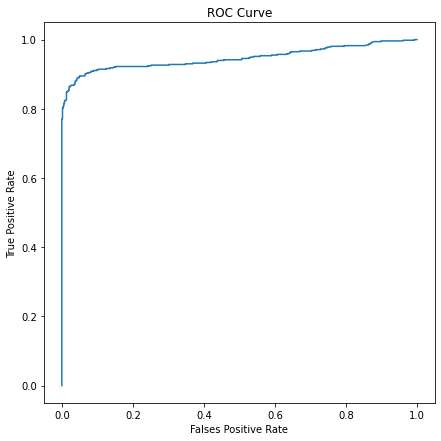

In [18]:
# your code here
fpr = summary.summary.roc.select('FPR').toPandas() #Falsse Positive Rate
tpr = summary.summary.roc.select('TPR').toPandas() #Total Positive Rate
plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.xlabel('Falses Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

##### Grading Feedback Cell

Your explanation here:<br>
1. The logsitic regression with a binary classification has the following: true positive, false positive, false negative, true negative. 
2. The ROC curve is created by plotting the true positive rate against the false positive rate for a single classifier at different thresholds.
3. TPR is calculated as True positive/(True Positive + False Negative)
4. FPR is calculated as False Negative/(False Negative + True Negative)
5. Obtain these true positive rates and false positive rates across a range of threshold probability values 
6. Then plot these two values to show ROC curve.

##### Grading Feedback Cell

**Extra Credit (5 pts)**  This question is optional.  If you choose to answer this question, you will earn 5 extra credit points.  If you choose not to answer this question, no points will be deducted from your score.  Solve the following equation for $c$ symbolically using the python sympy package.  Convert the solved symbolic solution to a latex format (this can be done with a python call), then populate the solution cell with the resulting latex code so that your solution shows up symbolically - similar the way that the equation below is rendered.

$$c g - c h + e \left(a + 1\right)^{b} - \frac{d \left(\left(a + 1\right)^{b} - 1\right)}{a} + \frac{f \left(\left(a + 1\right)^{b} - 1\right)}{a} = 0$$

/usr/local/lib/python3.7/dist-packages/sympy/core/relational.py:496: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


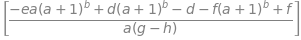

In [19]:
# your code here
from sympy import symbols, Function
from sympy import * 
import sympy as sym
from sympy.interactive import printing
printing.init_printing(use_latex=True)
c, h, g, a, b, d, f, e = symbols('c h g a b d f e')

# #c*g - c*h + sym.E *(a + 1)**b - (d*((a + 1)**b - 1)/a) + (f*((a+1)**b -1)/a) 
# c = (d*(a**2+b) - a*sym.E*(a+ 1)**b - f*(a**2 + b))/(a*(g-h))
# display(c)
x = Eq(( c * g) - (c * h) + sym.E *(a + 1)**b - (d*((a + 1)**b - 1)/a) + (f*((a+1)**b -1)/a))
y = 0
solve(x,c)

Your solved equation in latex here such that it renders as a human readable equation:<br>
